Importing Libraries

In [1]:
from wordcloud import WordCloud, STOPWORDS
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Importing Dataset

In [2]:
data=pd.read_csv("../input/stack-overflow-developer-survey-results-2019/survey_results_public.csv")

Exploring the data

In [3]:
data.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88883 entries, 0 to 88882
Data columns (total 85 columns):
Respondent                88883 non-null int64
MainBranch                88331 non-null object
Hobbyist                  88883 non-null object
OpenSourcer               88883 non-null object
OpenSource                86842 non-null object
Employment                87181 non-null object
Country                   88751 non-null object
Student                   87014 non-null object
EdLevel                   86390 non-null object
UndergradMajor            75614 non-null object
EduOther                  84260 non-null object
OrgSize                   71791 non-null object
DevType                   81335 non-null object
YearsCode                 87938 non-null object
Age1stCode                87634 non-null object
YearsCodePro              74331 non-null object
CareerSat                 72847 non-null object
JobSat                    70988 non-null object
MgrIdiot                  61

In [5]:
data.shape

(88883, 85)

In [6]:
data.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource',
       'Employment', 'Country', 'Student', 'EdLevel', 'UndergradMajor',
       'EduOther', 'OrgSize', 'DevType', 'YearsCode', 'Age1stCode',
       'YearsCodePro', 'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney',
       'MgrWant', 'JobSeek', 'LastHireDate', 'LastInt', 'FizzBuzz',
       'JobFactors', 'ResumeUpdate', 'CurrencySymbol', 'CurrencyDesc',
       'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs', 'WorkPlan',
       'WorkChallenge', 'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev',
       'CodeRevHrs', 'UnitTests', 'PurchaseHow', 'PurchaseWhat',
       'LanguageWorkedWith', 'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'WebFrameWorkedWith',
       'WebFrameDesireNextYear', 'MiscTechWorkedWith',
       'MiscTechDesireNextYear', 'DevEnviron', 'OpSys', 'Containers',
       'BlockchainOrg', 'BlockchainIs', 'BetterLife'

In [7]:
data.drop(columns={'Respondent','OpenSource','Student','EdLevel','EduOther','OrgSize','YearsCode','Age1stCode','MgrIdiot','MgrMoney','MgrWant','JobSeek','LastHireDate','LastInt','JobFactors','ResumeUpdate','CurrencyDesc','CompTotal','CompFreq','ConvertedComp','WorkRemote','ImpSyn','UnitTests','PurchaseHow','PurchaseWhat','OffOn','SocialMedia','Extraversion','ScreenName','SOVisit1st','SOVisitFreq','SOVisitTo','SOFindAnswer','SOTimeSaved','SOHowMuchTime','SOAccount','SOPartFreq','SOJobs','EntTeams','SOComm','SONewContent','Gender','Trans','Sexuality','Ethnicity','Dependents','SurveyLength','SurveyEase','FizzBuzz','CurrencySymbol','WelcomeChange','WorkPlan','WorkChallenge'},inplace=True)

In [8]:
data.shape

(88883, 32)

**ANALYSIS ON MAIN BRANCH**

In [9]:
data['MainBranch'].replace({'I am a student who is learning to code':'Student','I am not primarily a developer, but I write code sometimes as part of my work':'Not a Developer','I am a developer by profession':'Developer', 'I code primarily as a hobby':'Code as hobby','I used to be a developer by profession, but no longer am':'Was a Developer'},inplace=True)

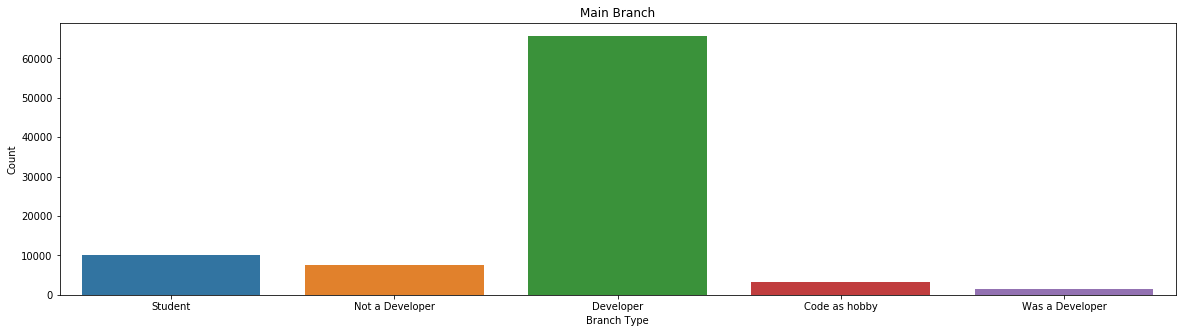

In [10]:
main_branch=data['MainBranch'].dropna()
plt.figure(figsize=(20,5))
sns.countplot(x=main_branch)
plt.xlabel('Branch Type', fontsize=10)
plt.ylabel('Count')
plt.title("Main Branch")
plt.show()

In [11]:
data_dev=data[data['MainBranch']=='Developer']

**ANALYSIS ON HOBBYIST**

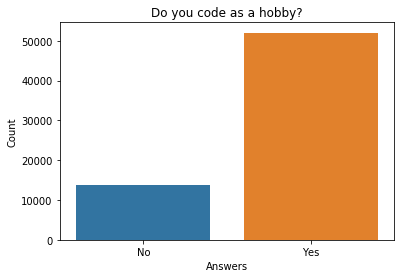

In [12]:
sns.countplot(x='Hobbyist',data=data_dev)
plt.xlabel('Answers')
plt.ylabel('Count')
plt.title("Do you code as a hobby?")
plt.show()

**ANALYSIS ON OPENSOURCER**

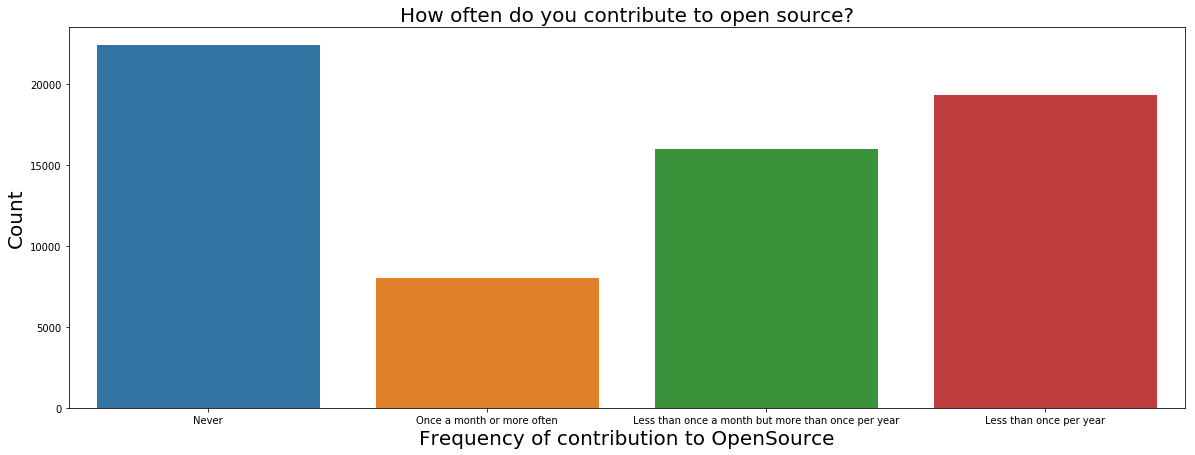

In [13]:
plt.figure(figsize=(20,7))
sns.countplot(x='OpenSourcer',data=data_dev)
plt.xlabel('Frequency of contribution to OpenSource', fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.title("How often do you contribute to open source?",fontsize=20)
plt.show()

**ANALYSIS ON YEARS OF CODE AS A PROFESSIONAL**

In [14]:
data_dev['YearsCodePro'].unique()

array(['Less than 1 year', '9', '4', '10', '8', '2', '3', '13', '18', '1',
       '5', '14', '22', '23', '19', '20', '25', '7', '15', '27', '48',
       '12', '35', '31', '11', '6', '17', '16', '21', nan, '30', '26',
       '33', '37', '40', '29', '28', '34', '24', '39', '38', '36', '32',
       '45', '43', '44', '42', '41', 'More than 50 years', '46', '49',
       '50', '47'], dtype=object)

In [15]:
data_dev['YearsCodePro'].replace({'Less than 1 year':0,'More than 50 years':51},inplace=True)
years_code=data_dev['YearsCodePro'].dropna()
years_code=years_code.astype(int)
max_year=years_code.max()
if(max_year==51):
    print ('Maximum Years of coding as a professional is more than 50 years')
else:
    print ('Maximum Years of coding as a professional is ',max_year,'years')

Maximum Years of coding as a professional is more than 50 years


/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:6788: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [16]:
data_dev['YearsCodePro'].value_counts().head(2)

2    6935
3    6924
Name: YearsCodePro, dtype: int64

In [17]:
min_year=years_code.min()
if(min_year==0):
    print ('Minimum Years of coding as a professional is less than 1 year')
else:
    print ('Minimum Years of coding as a professional is ',min_year,'years')

Minimum Years of coding as a professional is less than 1 year


**ANALYSIS ON EMPLOYMENT STATUS OF DEVELOPERS**

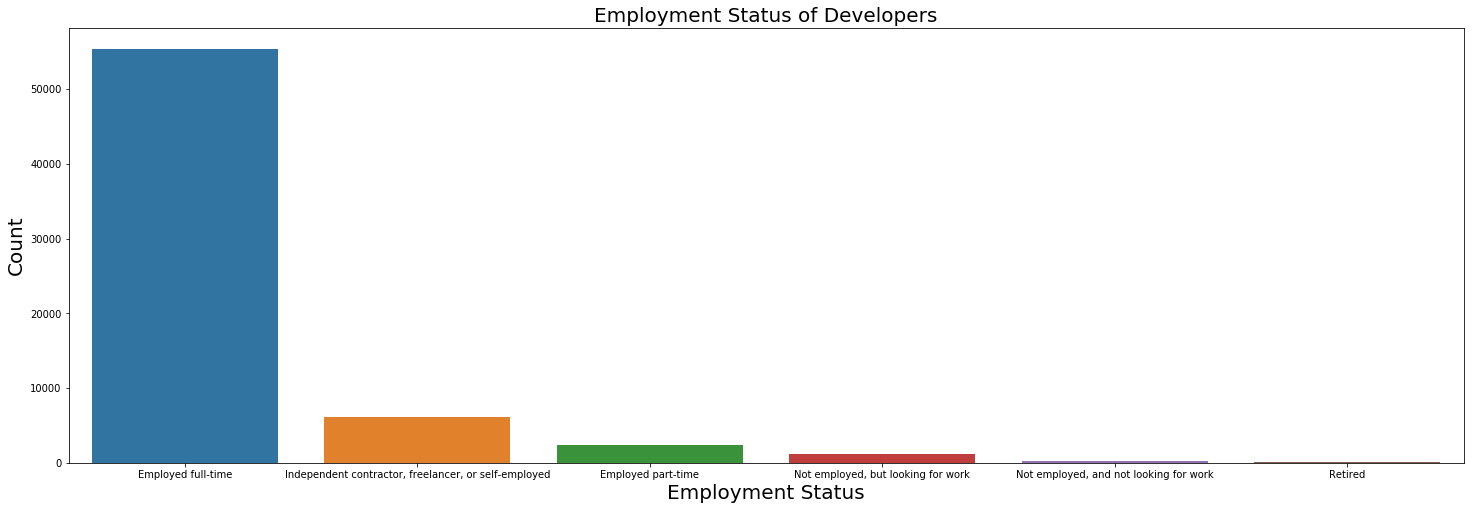

In [18]:
plt.figure(figsize=(25,8))
sns.countplot(x='Employment',data=data_dev)
plt.xlabel('Employment Status', fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.title("Employment Status of Developers",fontsize=20)
plt.show()

**ANALYSIS IN UNDERGRAD MAJOR**

In [19]:
data_dev['UndergradMajor'].value_counts().head()

Computer science, computer engineering, or software engineering          39886
Another engineering discipline (ex. civil, electrical, mechanical)        4469
Information systems, information technology, or system administration     3922
Web development or web design                                             2701
A natural science (ex. biology, chemistry, physics)                       2125
Name: UndergradMajor, dtype: int64

**ANALYSIS IN DEVELOPMENT TYPE**

In [20]:
data_dev['DevType'].value_counts().head()

Developer, full-stack                                             8077
Developer, back-end                                               4703
Developer, back-end;Developer, front-end;Developer, full-stack    2329
Developer, mobile                                                 2061
Developer, front-end                                              2035
Name: DevType, dtype: int64

**ANALYSIS ON CAREER SATISFACTION**

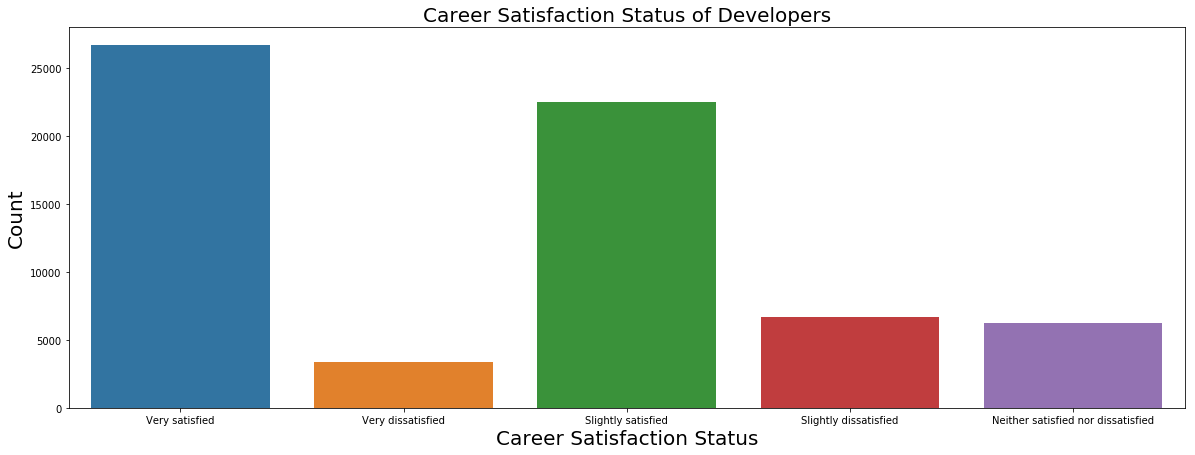

In [21]:
plt.figure(figsize=(20,7))
sns.countplot(x='CareerSat',data=data_dev)
plt.xlabel('Career Satisfaction Status', fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.title("Career Satisfaction Status of Developers",fontsize=20)
plt.show()

In [22]:
#marking career satifaction on a scale of 0 to 4, 2 being neutral
data_dev['CareerSat'].replace({'Slightly satisfied':1, 'Very satisfied':4, 'Very dissatisfied':0,
       'Slightly dissatisfied':3, 'Neither satisfied nor dissatisfied':2},inplace=True)

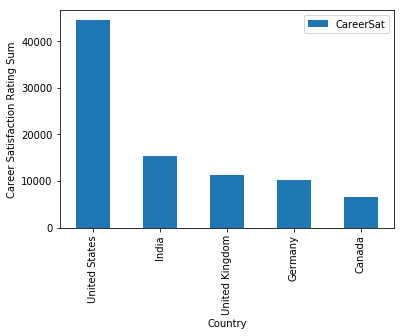

In [23]:
career_sat=data_dev.groupby('Country')['CareerSat'].sum().sort_values(ascending=False).head().reset_index()
career_sat.plot.bar(x='Country',y='CareerSat')
plt.xlabel('Country',fontsize=10)
plt.ylabel("Career Satisfaction Rating Sum",fontsize=10)
plt.show()

**ANALYSIS ON JOB SATISFACTION**

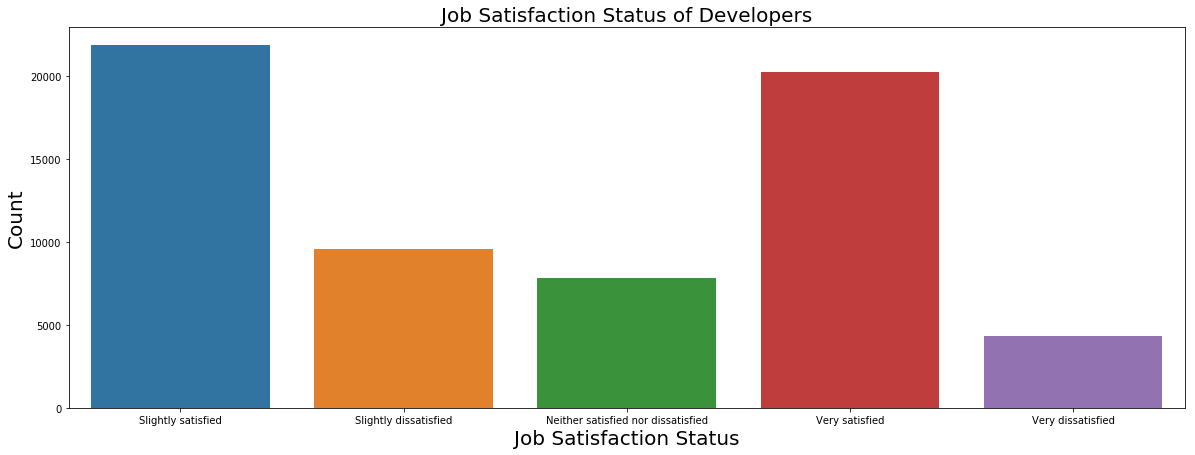

In [24]:
plt.figure(figsize=(20,7))
sns.countplot(x='JobSat',data=data_dev)
plt.xlabel('Job Satisfaction Status', fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.title("Job Satisfaction Status of Developers",fontsize=20)
plt.show()

In [25]:
#marking job satifaction on a scale of 0 to 4, 2 being neutral
data_dev['JobSat'].replace({'Slightly satisfied':1, 'Very satisfied':4, 'Very dissatisfied':0,
       'Slightly dissatisfied':3, 'Neither satisfied nor dissatisfied':2},inplace=True)

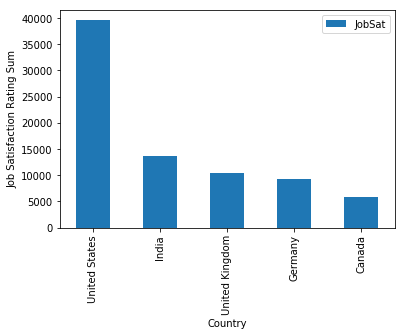

In [26]:
career_sat=data_dev.groupby('Country')['JobSat'].sum().sort_values(ascending=False).head().reset_index()
career_sat.plot.bar(x='Country',y='JobSat')
plt.xlabel('Country',fontsize=10)
plt.ylabel("Job Satisfaction Rating Sum",fontsize=10)
plt.show()

**ANALYSIS ON WORK WEEK HOURS**

In [27]:
work_hrs=data_dev.groupby('Country')['WorkWeekHrs'].sum().sort_values(ascending=False).head().reset_index()

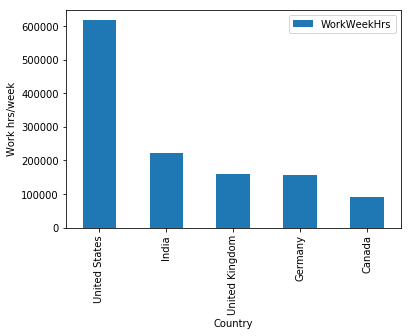

In [28]:
work_hrs.plot.bar(x='Country',y='WorkWeekHrs')
plt.xlabel('Country',fontsize=10)
plt.ylabel("Work hrs/week",fontsize=10)
plt.show()

In [29]:
data.columns

Index(['MainBranch', 'Hobbyist', 'OpenSourcer', 'Employment', 'Country',
       'UndergradMajor', 'DevType', 'YearsCodePro', 'CareerSat', 'JobSat',
       'WorkWeekHrs', 'WorkLoc', 'CodeRev', 'CodeRevHrs', 'LanguageWorkedWith',
       'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'WebFrameWorkedWith',
       'WebFrameDesireNextYear', 'MiscTechWorkedWith',
       'MiscTechDesireNextYear', 'DevEnviron', 'OpSys', 'Containers',
       'BlockchainOrg', 'BlockchainIs', 'BetterLife', 'ITperson', 'Age'],
      dtype='object')

**ANALYSIS ON WORK LOCATION**

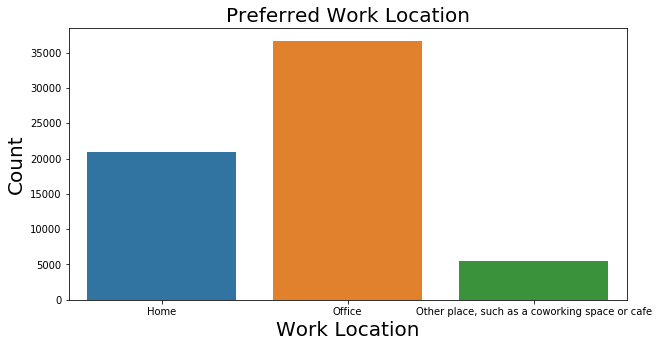

In [30]:
plt.figure(figsize=(10,5))
sns.countplot(x='WorkLoc',data=data_dev)
plt.xlabel('Work Location', fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.title("Preferred Work Location",fontsize=20)
plt.show()

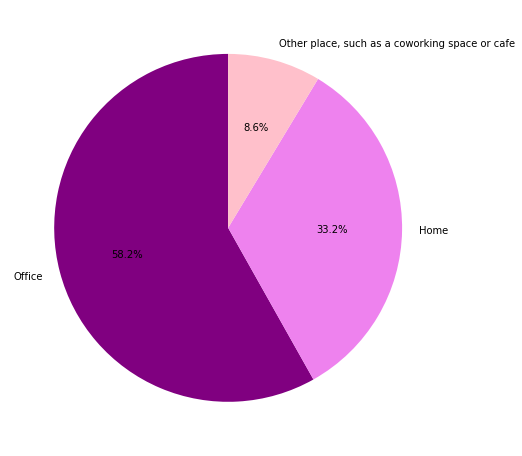

In [31]:
work_loc=data_dev['WorkLoc'].value_counts().reset_index()
colors=['purple','violet','pink']
plt.figure(figsize=(10,8))
plt.pie(work_loc['WorkLoc'],labels=work_loc['index'],colors=colors,startangle=90, autopct='%.1f%%')
plt.show()

**ANALYSIS ON CODE REVIEW**

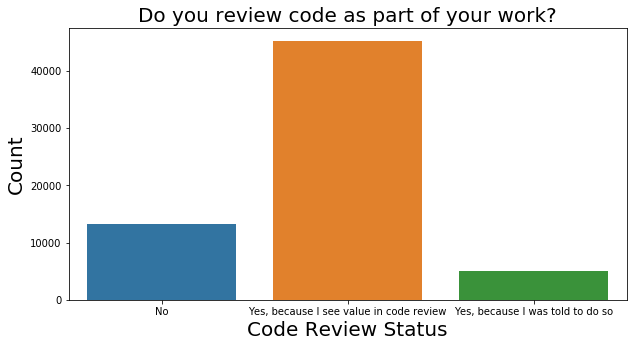

In [32]:
plt.figure(figsize=(10,5))
sns.countplot(x='CodeRev',data=data_dev)
plt.xlabel('Code Review Status', fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.title("Do you review code as part of your work?",fontsize=20)
plt.show()

**ANALYSIS ON CODE REVIEW HOURS**

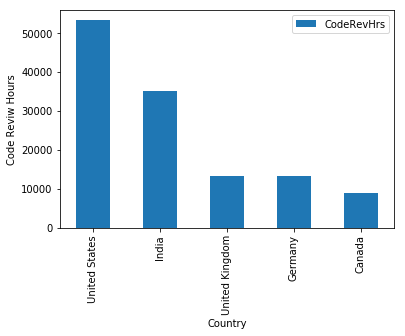

In [33]:
career_sat=data_dev.groupby('Country')['CodeRevHrs'].sum().sort_values(ascending=False).head().reset_index()
career_sat.plot.bar(x='Country',y='CodeRevHrs')
plt.xlabel('Country',fontsize=10)
plt.ylabel("Code Reviw Hours",fontsize=10)
plt.show()

**ANALYSIS ON TECHNICAL TRENDS**

In [34]:
def generate_word_column(column,colour):
    
    words = ''
    for i in data_dev[column]:
        try:
            a=i.split(';')
            for j in a:
                words+=' '+ j
        except:
            a=-999

    word_cloud = WordCloud(background_color=colour,max_font_size=300,width=2000, height=1080).generate(words)
    plt.figure(figsize=(20,8))
    plt.imshow(word_cloud)

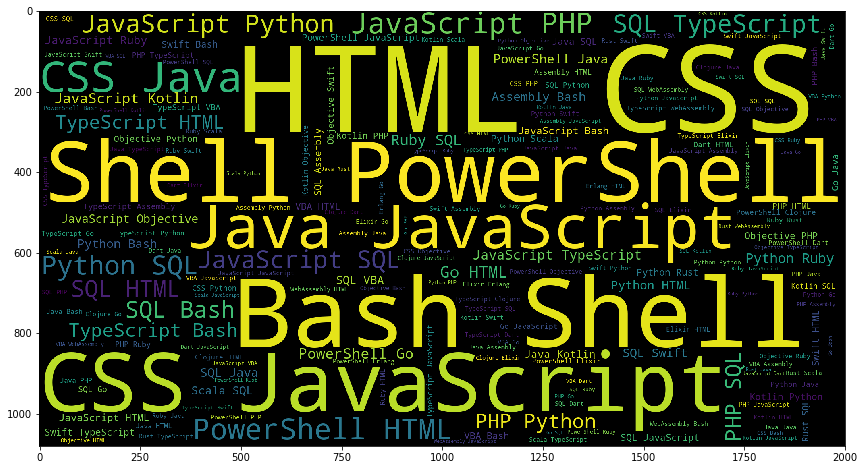

In [35]:
generate_word_column('LanguageWorkedWith','Black')

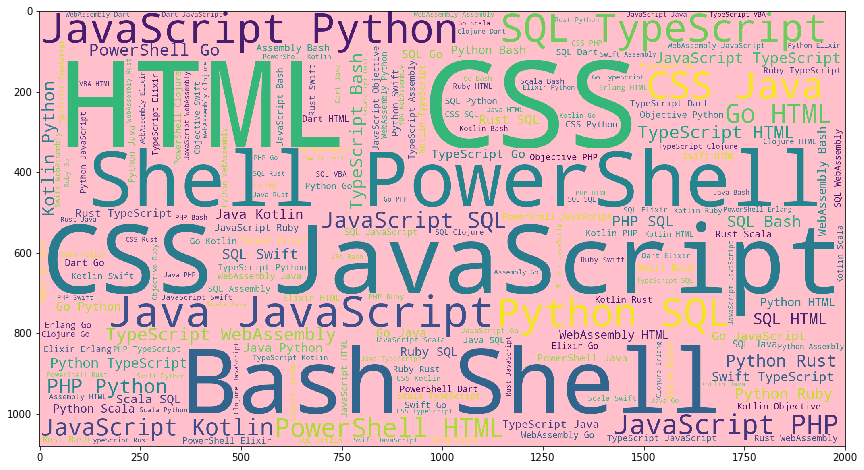

In [36]:
generate_word_column('LanguageDesireNextYear','Pink')

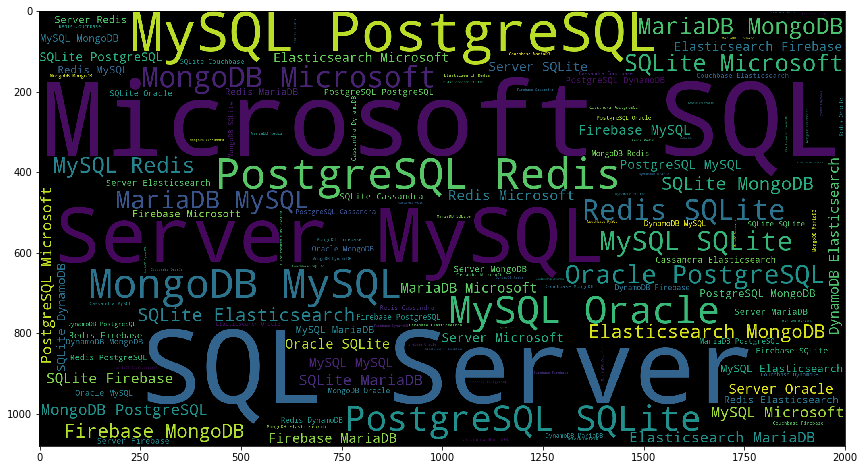

In [37]:
generate_word_column('DatabaseWorkedWith','Black')

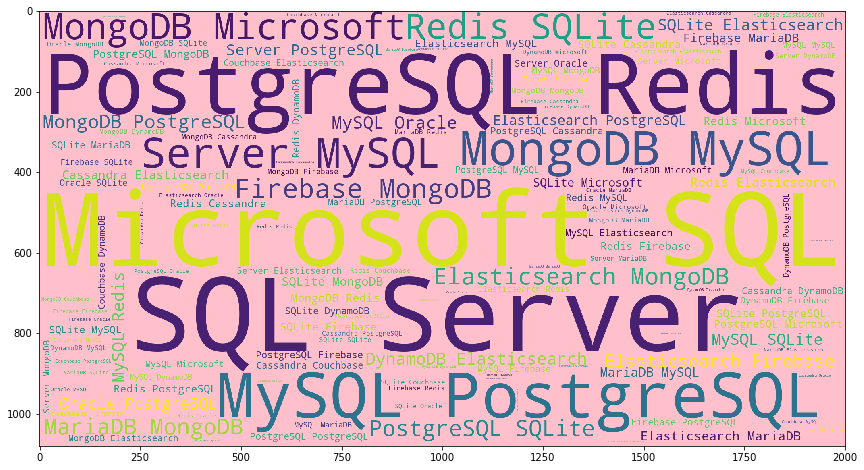

In [38]:
generate_word_column('DatabaseDesireNextYear','Pink')

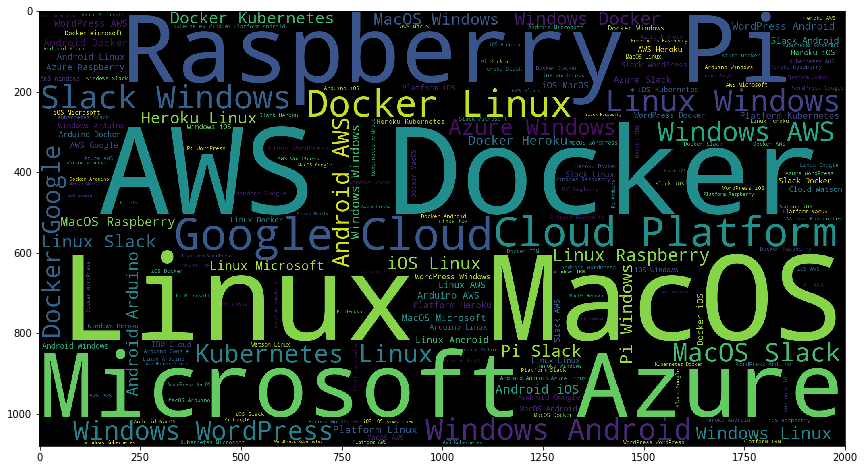

In [39]:
generate_word_column('PlatformWorkedWith','Black')

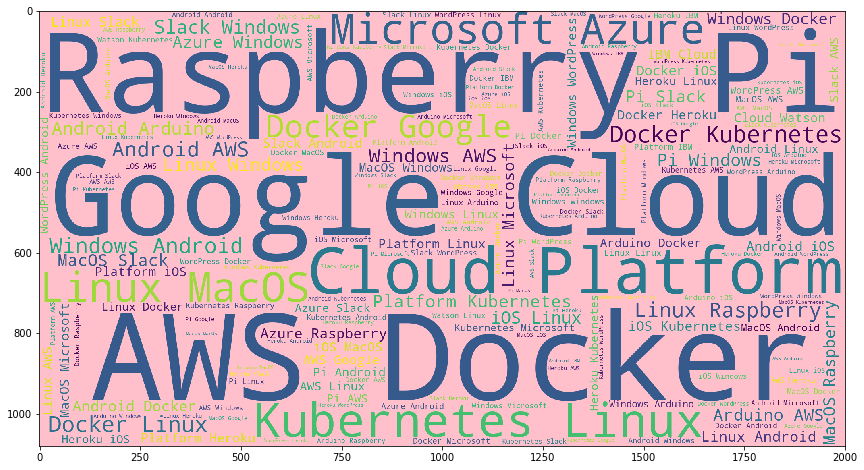

In [40]:
generate_word_column('PlatformDesireNextYear','Pink')

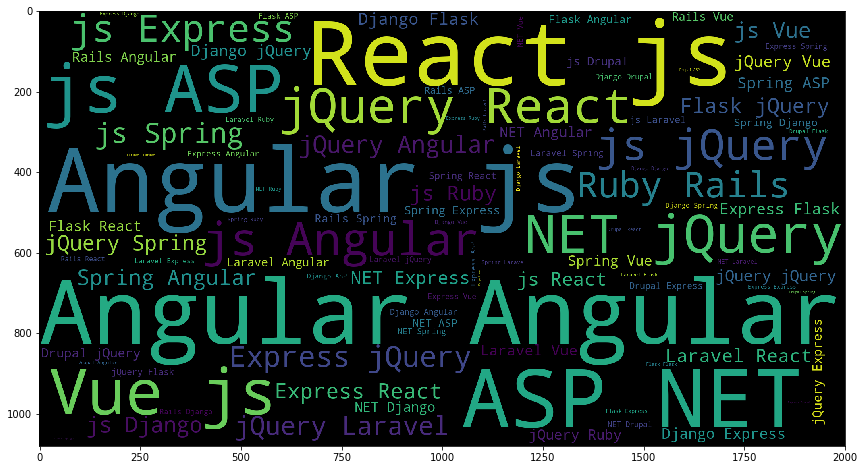

In [41]:
generate_word_column('WebFrameWorkedWith','Black')

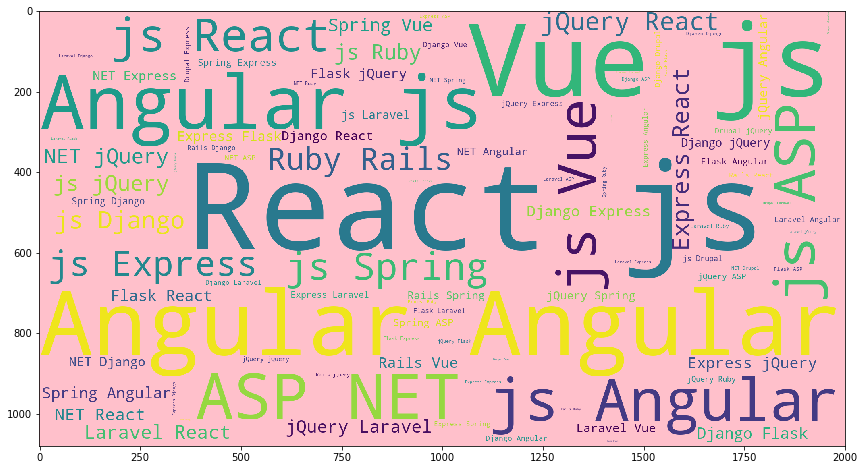

In [42]:
generate_word_column('WebFrameDesireNextYear','Pink')

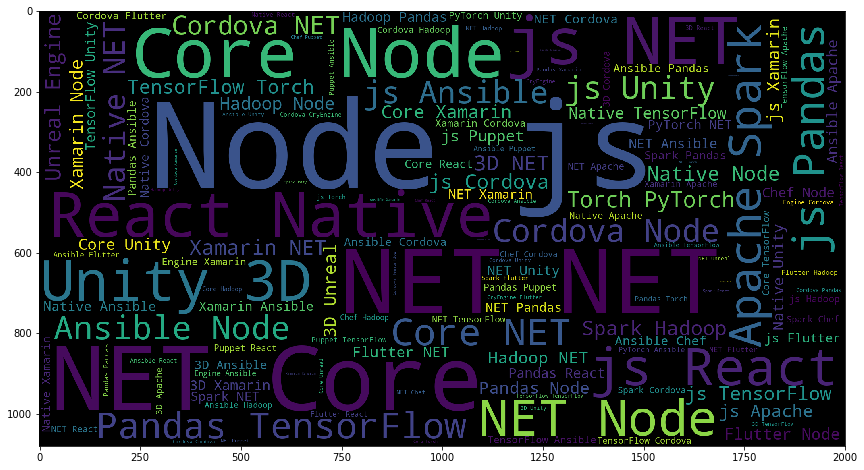

In [43]:
generate_word_column('MiscTechWorkedWith','Black')

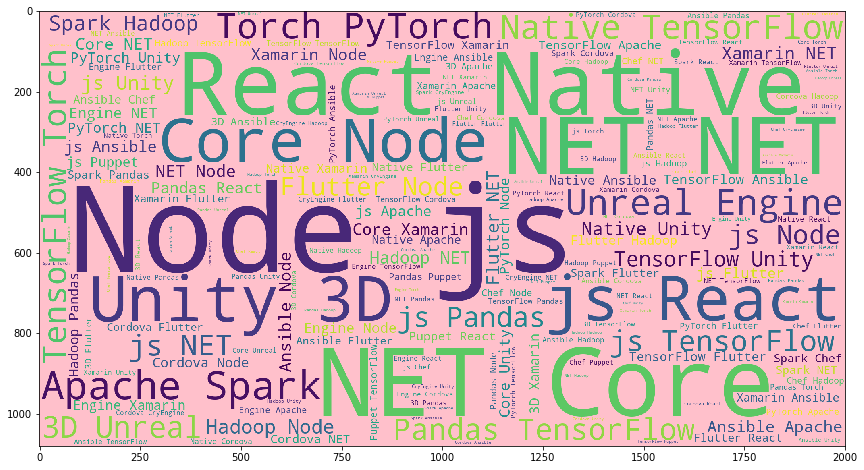

In [44]:
generate_word_column('MiscTechDesireNextYear','Pink')

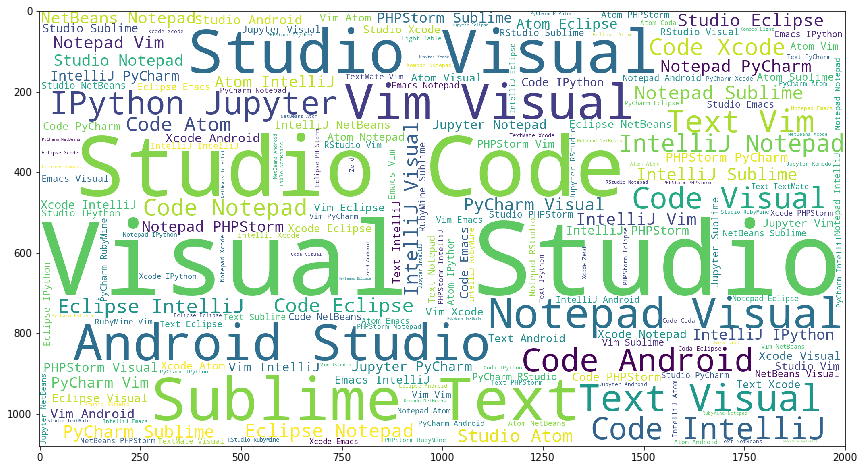

In [45]:
generate_word_column('DevEnviron','White')

**ANALYSIS ON OPERATING SYSTEM**

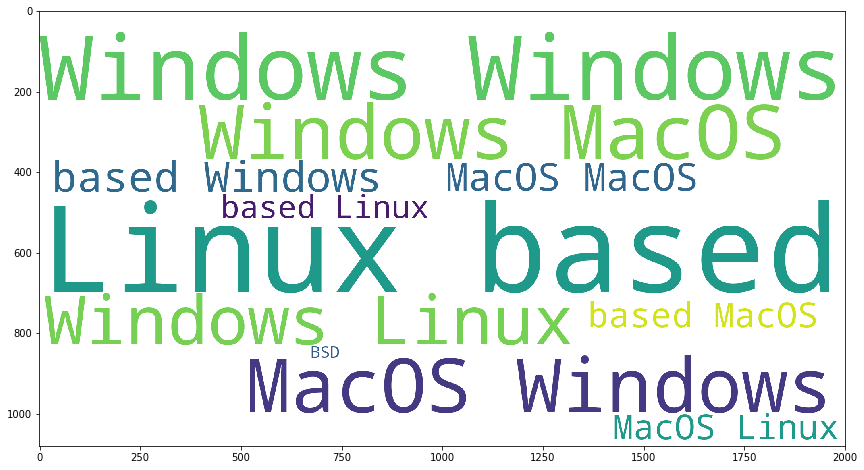

In [46]:
generate_word_column('OpSys','White')

In [47]:
data_dev['OpSys'].value_counts()

Windows        29235
MacOS          19614
Linux-based    16245
BSD               64
Name: OpSys, dtype: int64

**ANALYSIS ON BLOCKCHAIN ORGANIZATION**

In [48]:
data_dev['BlockchainOrg'].value_counts()

Not at all                                                 33569
Non-currency applications of blockchain                     5170
Implementing cryptocurrency-based products                  1669
Accepting Bitcoin or other coins and tokens as payments      791
Implementing our own cryptocurrency                          543
Name: BlockchainOrg, dtype: int64

**ANALYSIS ON AGE**

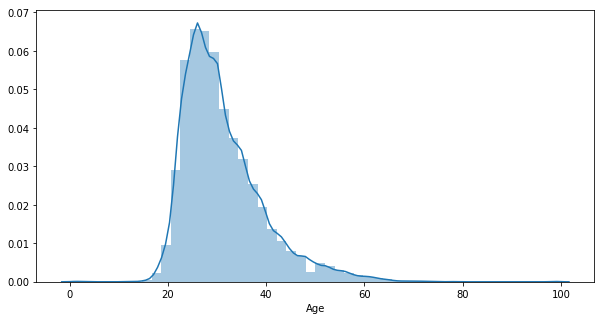

In [49]:
age=data_dev['Age'].dropna()
plt.figure(figsize=(10,5))
sns.distplot(age)